In [1]:
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [29]:
dirname = os.path.join(os.getcwd(), 'Brain Tumor Data Set')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tif|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\somal\OneDrive\Documentos\Master Inteligencia Artificial\Deep Learning\Brain Tumor Data Set\
C:\Users\somal\OneDrive\Documentos\Master Inteligencia Artificial\Deep Learning\Brain Tumor Data Set\Brain Tumor 1
C:\Users\somal\OneDrive\Documentos\Master Inteligencia Artificial\Deep Learning\Brain Tumor Data Set\Healthy 2445
Directorios leidos: 2
Imagenes en cada directorio [2446, 2080]
suma Total de imagenes en subdirs: 4526


In [30]:
import numpy as np

labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

img_brainxray=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    img_brainxray.append(name[len(name)-1])
    indice=indice+1


y = np.array(labels)
#X = np.array(images, dtype=np.float32) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Cantidad etiquetas creadas:  4526
0 Brain Tumor
1 Healthy
Total number of outputs :  2
Output classes :  [0 1]


In [23]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [24]:
gen = ImageDataGenerator(rescale=1./255,validation_split = 0.2,zoom_range=(0.99,0.99),dtype=tf.float32)

In [31]:
train = gen.flow_from_directory(dirname,
                               target_size = (150,150),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "training")



Found 3681 images belonging to 2 classes.


In [32]:
val = gen.flow_from_directory(dirname,
                               target_size = (150,150),
                               batch_size = 8,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "validation")

Found 919 images belonging to 2 classes.


In [41]:
gen2 = ImageDataGenerator(rescale=1./255,validation_split = 0.2,zoom_range=(0.99,0.99),dtype=tf.float32) 

In [42]:
test = gen.flow_from_directory(dirname,
                               target_size = (150,150),
                               batch_size = 8,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "validation")


Found 919 images belonging to 2 classes.


In [43]:
classes = val.class_indices

In [45]:
print (classes)

{'Brain Tumor': 0, 'Healthy': 1}


In [49]:
from keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten
from tensorflow.keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

model = keras.Sequential()
model.add(InputLayer(input_shape=(150,150,3)))
model.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer=Adam(0.001),loss = BinaryCrossentropy(),metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               11214976  
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)              

In [53]:
from keras import utils, callbacks

earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=5, restore_best_weights = True)

In [54]:
history = model.fit(train,verbose=1,callbacks = [earlystopping],epochs=20,validation_data=(val))

Epoch 1/20
15/15 [==============================] - 142s 9s/step - loss: 0.6356 - accuracy: 0.6827 - val_loss: 0.5191 - val_accuracy: 0.7552
Epoch 2/20
15/15 [==============================] - 156s 10s/step - loss: 0.3924 - accuracy: 0.8280 - val_loss: 0.3846 - val_accuracy: 0.8651
Epoch 3/20
15/15 [==============================] - 154s 10s/step - loss: 0.2283 - accuracy: 0.9125 - val_loss: 0.3753 - val_accuracy: 0.8934
Epoch 4/20
15/15 [==============================] - 143s 10s/step - loss: 0.1316 - accuracy: 0.9573 - val_loss: 0.3249 - val_accuracy: 0.8945
Epoch 5/20
15/15 [==============================] - 152s 10s/step - loss: 0.0857 - accuracy: 0.9783 - val_loss: 0.2680 - val_accuracy: 0.9576
Epoch 6/20
15/15 [==============================] - 150s 10s/step - loss: 0.0608 - accuracy: 0.9851 - val_loss: 0.2944 - val_accuracy: 0.9391
Epoch 7/20
15/15 [==============================] - 134s 9s/step - loss: 0.0463 - accuracy: 0.9908 - val_loss: 0.2052 - val_accuracy: 0.9793
Epoch 8/

Text(0, 0.5, 'Accuracy')

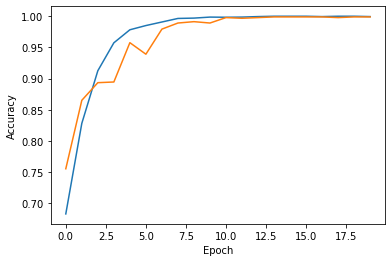

In [55]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

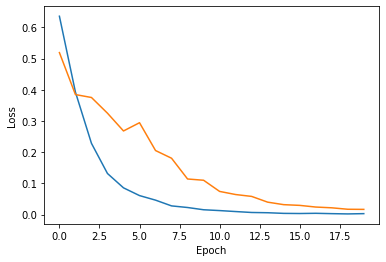

In [56]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [58]:
test_eval = model.evaluate(test, batch_size=128)

print("test loss, test acc:", test_eval)


115/115 [==============================] - 18s 156ms/step - loss: 0.0166 - accuracy: 0.9989
test loss, test acc: [0.01663965731859207, 0.9989118576049805]
